In [1]:
import pandas as pd
import numpy as np

In [6]:
data = pd.read_csv('data_flats.csv', sep=';')
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [10]:
list(data.sub_area.value_counts().index)

['Poselenie Sosenskoe',
 'Nekrasovka',
 'Poselenie Vnukovskoe',
 'Poselenie Moskovskij',
 'Poselenie Voskresenskoe',
 'Mitino',
 'Tverskoe',
 'Krjukovo',
 "Mar'ino",
 'Poselenie Filimonkovskoe',
 'Juzhnoe Butovo',
 'Poselenie Shherbinka',
 'Solncevo',
 'Zapadnoe Degunino',
 'Poselenie Desjonovskoe',
 'Otradnoe',
 'Nagatinskij Zaton',
 'Nagornoe',
 'Bogorodskoe',
 'Strogino',
 'Izmajlovo',
 "Tekstil'shhiki",
 'Ljublino',
 "Gol'janovo",
 'Severnoe Tushino',
 'Chertanovo Juzhnoe',
 'Birjulevo Vostochnoe',
 'Vyhino-Zhulebino',
 'Horoshevo-Mnevniki',
 'Zjuzino',
 'Ochakovo-Matveevskoe',
 'Perovo',
 'Ramenki',
 'Jasenevo',
 'Kosino-Uhtomskoe',
 'Bibirevo',
 'Golovinskoe',
 "Kuz'minki",
 "Kon'kovo",
 'Caricyno',
 'Veshnjaki',
 'Akademicheskoe',
 'Orehovo-Borisovo Juzhnoe',
 'Koptevo',
 'Orehovo-Borisovo Severnoe',
 'Novogireevo',
 'Chertanovo Severnoe',
 'Danilovskoe',
 'Ivanovskoe',
 'Mozhajskoe',
 "Chertanovo Central'noe",
 'Pechatniki',
 'Presnenskoe',
 'Sokolinaja Gora',
 'Obruchevskoe',


In [2]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [3]:
vis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [ ]:
state_max = list(vis_data.state.value_counts().head(1).index)

In [ ]:
result = vis_data.state.fillna(state_max[0])

In [ ]:
result

In [ ]:
data.dropna(axis=0)

In [ ]:
balance = np.array(vis_data.balance_due).reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(balance).min()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(balance).min()

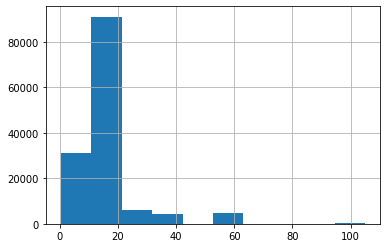

In [4]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist()

In [5]:
median_balance = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).median()
mean_balance = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).mean()
abs(median_balance - mean_balance)

0.4525960609393067

In [8]:
import seaborn as sns

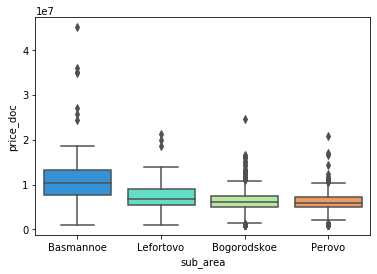

In [22]:
price = data[['sub_area', 'price_doc']].loc[(data.sub_area=='Perovo')|(data.sub_area=='Basmannoe')|
                                            (data.sub_area=='Lefortovo')|(data.sub_area=='Bogorodskoe')]
sns.boxplot(x="sub_area", y="price_doc", data=price, palette='rainbow');